# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # When city names have spaces replace the spaces with %20  
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found and skip NaN records
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=ginda
Processing Record 2 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=georgetown
Processing Record 3 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=mataura
City not found. Skipping...
Processing Record 4 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=bethel
Processing Record 5 | Samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=samana
Processing Record 6 | Biggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=biggar
Processing Record 7 | Ostrovnoy
http://api.openweathermap.org/data/2.5/we

Processing Record 56 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=ahipara
Processing Record 57 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=avarua
Processing Record 58 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=kaitangata
Processing Record 59 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=fortuna
Processing Record 60 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=cabo%20san%20lucas
Processing Record 61 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=tura
Processing Record 62 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q

Processing Record 111 | Voykove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=voykove
Processing Record 112 | Opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=opuwo
Processing Record 113 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=constitucion
Processing Record 114 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=kavieng
Processing Record 115 | Charters Towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=charters%20towers
Processing Record 116 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=mar%20del%20plata
Processing Record 117 | North Battleford
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 166 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=port%20blair
Processing Record 167 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=arraial%20do%20cabo
Processing Record 168 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=lorengau
Processing Record 169 | Igurubi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=igurubi
Processing Record 170 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=touros
Processing Record 171 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=palmer
Processing Record 172 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35

Processing Record 222 | Masyaf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=masyaf
Processing Record 223 | Huangchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=huangchuan
Processing Record 224 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=margate
Processing Record 225 | Anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=anchorage
Processing Record 226 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=vardo
Processing Record 227 | Valencia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=valencia
Processing Record 228 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06a

Processing Record 278 | Alnavar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=alnavar
Processing Record 279 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=naze
Processing Record 280 | Tres Arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=tres%20arroyos
Processing Record 281 | Suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=suntar
Processing Record 282 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=ribeira%20grande
Processing Record 283 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=brae
Processing Record 284 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc0

Processing Record 332 | Worland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=worland
Processing Record 333 | Sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=sayyan
Processing Record 334 | Moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=moree
Processing Record 335 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=yerbogachen
Processing Record 336 | Yuzawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=yuzawa
Processing Record 337 | Ambanja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=ambanja
Processing Record 338 | Finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=finnsn

Processing Record 388 | Vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=vallenar
Processing Record 389 | Masvingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=masvingo
Processing Record 390 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=emba
Processing Record 391 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=zyryanka
Processing Record 392 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=oranjestad
Processing Record 393 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=rawson
Processing Record 394 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=lagoa

Processing Record 444 | Turiacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=turiacu
Processing Record 445 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=mitsamiouli
Processing Record 446 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=saint%20anthony
City not found. Skipping...
Processing Record 447 | Khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=khandbari
Processing Record 448 | Ilave
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=ilave
Processing Record 449 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=gushikawa
Processing Record 450 | Manzhouli
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 501 | Yuryevets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=yuryevets
Processing Record 502 | Fleetwood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=fleetwood
Processing Record 503 | Mayya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=mayya
Processing Record 504 | Teofilo Otoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=teofilo%20otoni
Processing Record 505 | Helmstedt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=helmstedt
Processing Record 506 | Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0cd8a9edb35d346ddc06ae260f&q=colares
Processing Record 507 | Conceicao do Almeida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8aa62b0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lon":lon, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Export city data to .csv
weather_data.to_csv("output/weather_data.csv")

# Display count of weather data values 
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lon           534
Max Temp      534
Wind Speed    534
dtype: int64

In [6]:
# Check data frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Ginda,1,IN,1561933914,48,30.69,78.49,61.81,5.46
1,Georgetown,20,GY,1561933679,83,6.80,-58.16,82.40,16.11
2,Mataura,90,NZ,1561933917,76,-46.19,168.86,51.01,3.00
3,Bethel,90,US,1561933861,87,60.79,-161.76,55.40,12.75
4,Samana,75,EC,1561933919,74,0.12,-76.97,84.20,2.24


In [16]:
# Find the outlier Humidity data
weather_data.sort_values('Humidity', axis = 0, ascending = False, 
                 inplace = True) 

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
493,Talara,0,PE,1561934794,290,-4.58,-81.27,62.60,12.75
275,Lerwick,75,GB,1561934385,100,60.15,-1.15,53.60,18.34
61,Hasaki,75,JP,1561934033,100,35.73,140.83,71.60,2.24
313,Bereda,90,ES,1561934448,100,43.27,-7.54,64.99,4.70
82,Esperance,13,AU,1561934072,100,-33.86,121.89,48.20,10.29


In [17]:
# Delete outlier Humidity
weather_data = weather_data[weather_data.Humidity != 290]
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
275,Lerwick,75,GB,1561934385,100,60.15,-1.15,53.60,18.34
61,Hasaki,75,JP,1561934033,100,35.73,140.83,71.60,2.24
313,Bereda,90,ES,1561934448,100,43.27,-7.54,64.99,4.70
82,Esperance,13,AU,1561934072,100,-33.86,121.89,48.20,10.29
51,Griffith,59,AU,1561934020,100,-34.29,146.06,35.60,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

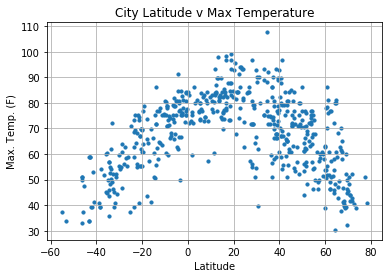

In [7]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Graph properties
plt.title("City Latitude v Max Temperature")
plt.ylabel("Max. Temp. (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Max_Temp_v_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

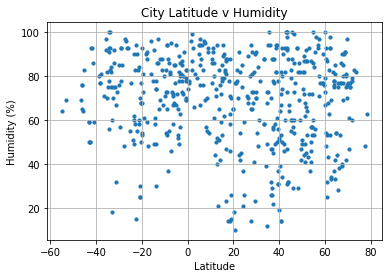

In [18]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Graph properties
plt.title("City Latitude v Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Humidity_v_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

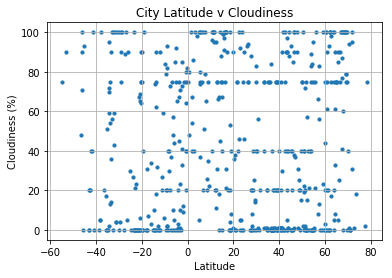

In [9]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

## Graph properties
plt.title("City Latitude v Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Cloudiness_v_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

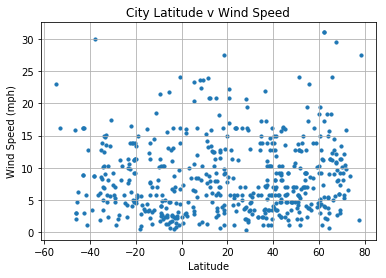

In [10]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Graph properties
plt.title("City Latitude v Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Wind_Speed_v_Latitude.png")

# Show plot
plt.show()